# Lab 1.1 Analysis
** Jason Chou **

---
### Scientific Target: M81 from the 2016/03/30 archive for the 24 inch

In [46]:
import numpy as np
import pyfits
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [54]:
exec(open('/afs/ir.stanford.edu/class/physics100/workdir/g2/Jason/Lab1.1/process.py'))
exec(open('/afs/ir.stanford.edu/class/physics100/workdir/g2/Jason/Lab1.1/supp.py'))

To effectively choose the calibration data, we should check the following:
* **Date and time**: The calibration images and the target (here M81) should be observed in roughly the same date and time. This minimizes contaminations from long-term variation like weather, etc.
* **Exposure duration**: This is important for dark frame calibration, as we do not want to subtract too much or too less dark frame images from the science images.
* **CCD temperature**: Also necessary for dark frame subtraction because dark currents are highly dependent on temperature. The images with substantially different temperatures should be thrown away.
* **Filter**: Although we have no idea how the flat field calibration images were obtained (e.g., twilight, dark sky, or other sources), the wavelength is always a cruicial factor for the properties of the images. So we have to make sure that we correct for the flat field images in the same band as the science images.

In [4]:
## where we've linked the archival data
datadir = '/afs/ir.stanford.edu/class/physics100/workdir/g2/M81/arch_1'

In [5]:
## list of the fits file
M81_R_list = np.asarray(pd.read_csv(datadir+'/R/fitsfiles.list'))
M81_G_list = np.asarray(pd.read_csv(datadir+'/G/fitsfiles.list'))
M81_B_list = np.asarray(pd.read_csv(datadir+'/B/fitsfiles.list'))
M81_Cali_list = np.asarray(pd.read_csv(datadir+'/Cali/fitsfiles.list'))

Take a look at a header, what is missing?<br>
No target name (or coordinates) and angular size of the pixels (or equivalently the focal length)!

Fortunately we know the first from the file name and the second is not needed for our purpose (which I suppose so because all images were taken with the same settings)

In [6]:
test = pyfits.open(M81_Cali_list[0][0])
print test[0].header

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                  512 /fastest changing axis                           
NAXIS2  =                  512 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
INSTRUME= 'Apogee  ' /          instrument or camera used                       
DATE-OBS= '2016-03-26T19:59:29' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =  0.00000000000000000 /Exposure time in seconds                        
EXPOSURE=  0.00000000000000000 /Exposure time in seconds                        
SET-TEMP=  -40.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -39.8363095238095

---
### Selection of calibration data
Science data

In [59]:
display_header(M81_R_list)
display_header(M81_G_list)
display_header(M81_B_list)

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/R/M81_002R.fit
starttime  2016-03-30T20:50:16
duration   40.0
ccd temp   -39.9255952381
filter     Red

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/R/M81_003R.fit
starttime  2016-03-30T20:53:44
duration   40.0
ccd temp   -39.9255952381
filter     Red

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/R/M81_004R.fit
starttime  2016-03-30T20:57:12
duration   40.0
ccd temp   -39.9702380952
filter     Red

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/R/M81_005R.fit
starttime  2016-03-30T20:59:49
duration   40.0
ccd temp   -39.9702380952
filter     Red

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/R/M81_006R.fit
starttime  2016-03-30T21:03:17
duration   40.0
ccd temp   -40.0148809524
filter     Red

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/R/M81_007R.fit
starttime  2016-03-30T21:05:54
duration   40.0
ccd temp   -40.0148809524
filter     Red

/afs/.ir/users/j

It seems that these observations were made at about 21:00 (on 3/30/16) an dthe CCD temperature was always around -40. The exposure time was fixed at 40 seconds. But which ones should I use?
* To conform to the observation time for the dark frames (below), how about around 20:58?
* I also noticed "drifting" of the sources from frame to frame (observed at different times). This indicates that the telescope was NOT rotating accordingly (at least not correctly). This augments the previous point of choosing images -- R, G, B -- that were observed concurrently. In addition, this infers that we should NOT combine multiple science images (for calibrations, they are artifacts in the optical system independent of the sky so we can still do that)! I end up choosing the following: `004B`, `004G`, and `005R`.

To make sure that the sky appeared at the same position on these three images, the following `DS9` images show a over-saturated rendering of the zoomed-in source. The readings of the pixel values are for the little encircled point source (presumably a background source). (Unfortunately each image took 40 seconds so there is no way to find perfectly matching images; nonetheless, the discrepancy is within one pixel, which should be fine)<br><br>
<img src="./imgs/oversat_R.png" width="800">
<img src="./imgs/oversat_G.png" width="800">
<img src="./imgs/oversat_B.png" width="800">

Now the calibration data<br>
- **Bias**

In [60]:
display_header(M81_Cali_list,option='bias')

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/bias_002.fit
starttime  2016-03-26T19:59:29
duration   0.0
ccd temp   -39.8363095238
filter     Bias Frame

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/bias_003.fit
starttime  2016-03-26T19:59:39
duration   0.0
ccd temp   -39.8363095238
filter     Bias Frame

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/bias_004.fit
starttime  2016-03-26T19:59:49
duration   0.0
ccd temp   -39.8363095238
filter     Bias Frame

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/bias_005.fit
starttime  2016-03-26T19:59:59
duration   0.0
ccd temp   -39.8363095238
filter     Bias Frame

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/bias_006.fit
starttime  2016-03-26T20:00:10
duration   0.0
ccd temp   -39.8363095238
filter     Bias Frame

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/bias_007.fit
starttime  2016-03-26T20:00:20
duration   0.0
ccd temp   

Well, sadly they were all obtained on a different date... But let us assume that the instrument was maintained at the same status... We should check if there was "cosmic ray events" as well:

In [67]:
image_range(M81_Cali_list,option='bias')

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/bias_002.fit
Max = 4380.0, Median = 3929.0, Min = 3837.0
/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/bias_003.fit
Max = 4509.0, Median = 3942.0, Min = 3837.0
/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/bias_004.fit
Max = 4367.0, Median = 3932.0, Min = 3835.0
/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/bias_005.fit
Max = 4448.0, Median = 3932.0, Min = 3834.0
/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/bias_006.fit
Max = 4361.0, Median = 3932.0, Min = 3835.0
/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/bias_007.fit
Max = 4353.0, Median = 3940.0, Min = 3836.0
/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/bias_008.fit
Max = 5721.0, Median = 3940.0, Min = 3837.0
/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/bias_009.fit
Max = 4360.0, Median = 3931.0, Min = 3837.0
/afs/.ir/users/j/a/jason

From this, albeit that some files (e.g. 008 and 010) contain abnormally large readings (which could be attributed to cosmic rays!), the medians are similar. So I'll keep all of them in the calibration below.

- **Dark frame**

In [61]:
display_header(M81_Cali_list,option='dark')

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/dark_001.fit
starttime  2016-03-30T22:38:34
duration   50.0
ccd temp   -39.9107142857
filter     Dark Frame

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/dark_002.fit
starttime  2016-03-30T22:45:49
duration   50.0
ccd temp   -39.9255952381
filter     Dark Frame

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/dark_003.fit
starttime  2016-03-30T22:49:57
duration   50.0
ccd temp   -39.9255952381
filter     Dark Frame

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/dark_004.fit
starttime  2016-03-30T22:54:05
duration   50.0
ccd temp   -39.9255952381
filter     Dark Frame

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/dark_005.fit
starttime  2016-03-30T22:58:13
duration   50.0
ccd temp   -39.9404761905
filter     Dark Frame



Apparently the first dark frame image was acquired a bit too early, I will not use it (cf. the first science image was made at ~22:50; and the temperutares differ too). Also note the exposure time difference! 
- **Flat field**

In [69]:
display_header(M81_Cali_list,option='flat')

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/flat_001B.fit
starttime  2016-03-26T19:35:07
duration   0.75
ccd temp   -39.4047619048
filter     Blue

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/flat_001G.fit
starttime  2016-03-26T19:34:53
duration   0.75
ccd temp   -39.4047619048
filter     Green

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/flat_001R.fit
starttime  2016-03-26T19:34:39
duration   0.75
ccd temp   -39.4047619048
filter     Red

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/flat_002B.fit
starttime  2016-03-26T19:36:07
duration   0.75
ccd temp   -39.4196428571
filter     Blue

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/flat_002G.fit
starttime  2016-03-26T19:35:53
duration   0.75
ccd temp   -39.4196428571
filter     Green

/afs/.ir/users/j/a/jasonhc/physics100/workdir/g2/M81/arch_1/Cali/flat_002R.fit
starttime  2016-03-26T19:35:37
duration   0.75
ccd temp   -39.4196428571
fi

Alright... again 26th not 30th... Forget about my intention to select based on time... Nevertheless, two things to be noted here:
1. Exposure time was constant: 0.75. This should be accounted for.
2. Temperatures in earlier images were a bit too high. This might be a concern because temperature could potentially affect the flat field too. But to preserve sufficient images, I cannot discard too many images either. I will use a threshold temperature of -39.8, which corresponds to using images from "flat_013*".

#### Selection done

In [225]:
sciencefile  = [M81_R_list[3][0],M81_G_list[2][0],M81_B_list[2][0]]
flatfilelist = [i[0] for i in M81_Cali_list if 'flat' in i[0]][36:]
darkfilelist = [i[0] for i in M81_Cali_list if 'dark' in i[0]][1:]
biasfilelist = [i[0] for i in M81_Cali_list if 'bias' in i[0]]
basename = 'M81'

In [48]:
finalbias=AverageBias(biasfilelist) 
print 'Bias Image Created'
#print finalbias.shape

Bias Image Created


<matplotlib.colorbar.Colorbar instance at 0x7f096ee0a908>

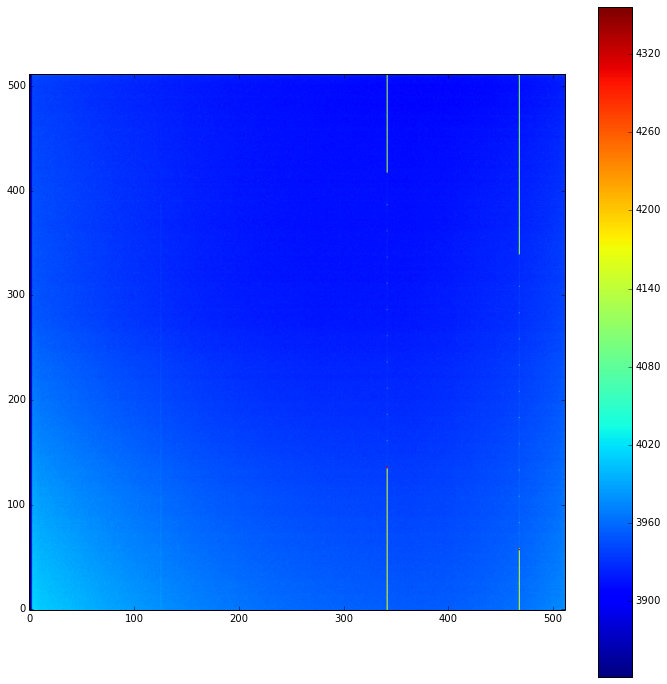

In [169]:
plt.figure(figsize=(12,12))
plt.imshow(finalbias, origin='lower')
plt.colorbar()

This is consistent with what we see on `DS9` for individual images. So the process did not go wrong.

In [58]:
finaldark=AverageDark(darkfilelist,finalbias)

print 'Dark Current Image Created'
#print finaldark.shape

Dark Current Image Created


<matplotlib.colorbar.Colorbar instance at 0x7f097428b320>

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


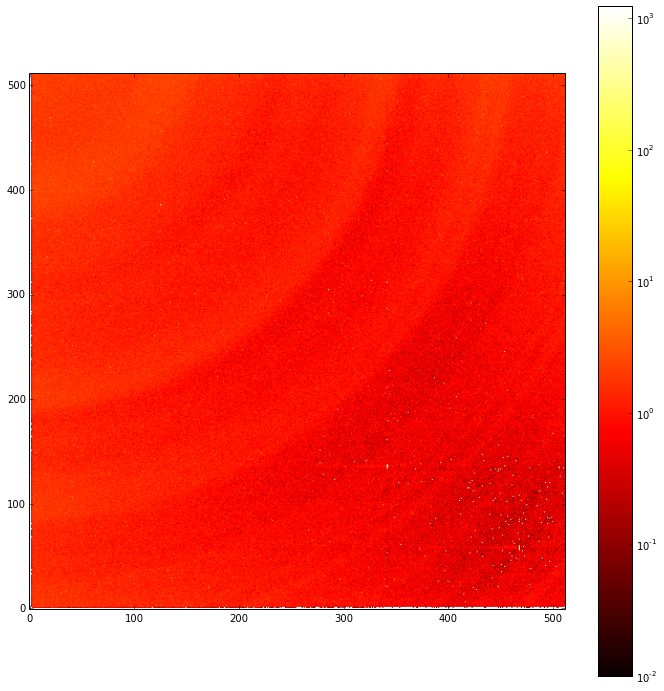

In [63]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(12,12))
plt.imshow(finaldark, origin='lower', cmap="hot", norm=LogNorm())
plt.colorbar()

This is good. We see that the "fialed" pixels in the bias image are almost removed

In [165]:
a = np.ones((10,10))
b = np.ones((6,10,10))*2
np.median(b,axis=None)

2.0

(9, 512, 512)


<matplotlib.colorbar.Colorbar instance at 0x7f096ee8e5f0>

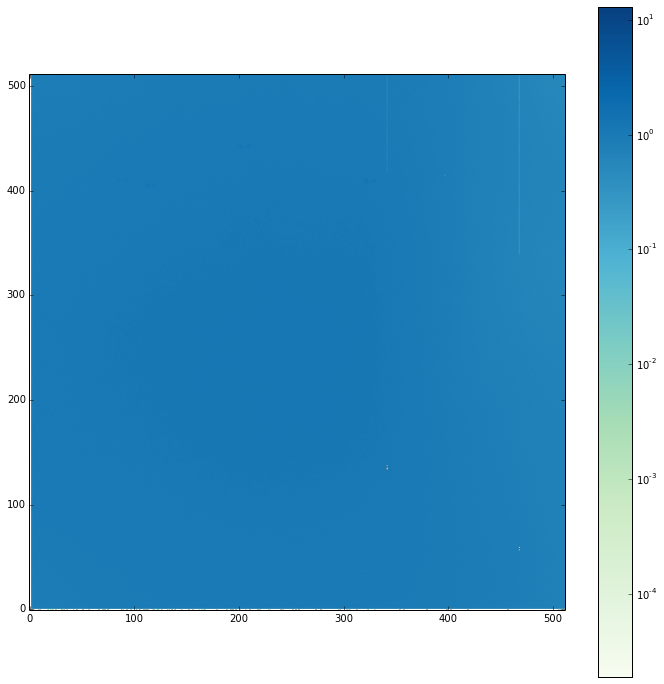

In [168]:
finalflat = AverageFlat(flatfilelist,finalbias,finaldark)

plt.figure(figsize=(12,12))
plt.imshow(finalflat, origin='lower', cmap="GnBu", norm=LogNorm())
plt.colorbar()

Unfortunately there's still remaining biases... Evidently the telescope was not stable enough...

In [176]:
rawdata_R = pyfits.open(sciencefile[0])[0]
rawdata_G = pyfits.open(sciencefile[1])[0]
rawdata_B = pyfits.open(sciencefile[2])[0]

In [177]:
finalimage_R = ScienceExposure(rawdata_R,finalbias,finaldark,finalflat)
finalimage_G = ScienceExposure(rawdata_G,finalbias,finaldark,finalflat)
finalimage_B = ScienceExposure(rawdata_B,finalbias,finaldark,finalflat)

sciheader_R = rawdata_R.header
sciheader_G = rawdata_R.header
sciheader_B = rawdata_R.header

## Results
Here I display the final images of the R, G, B components, in log-scale. Two defects:
* The vertial "bias" lines in the top-right corners
* A small "bias" spot at the lower-right corners

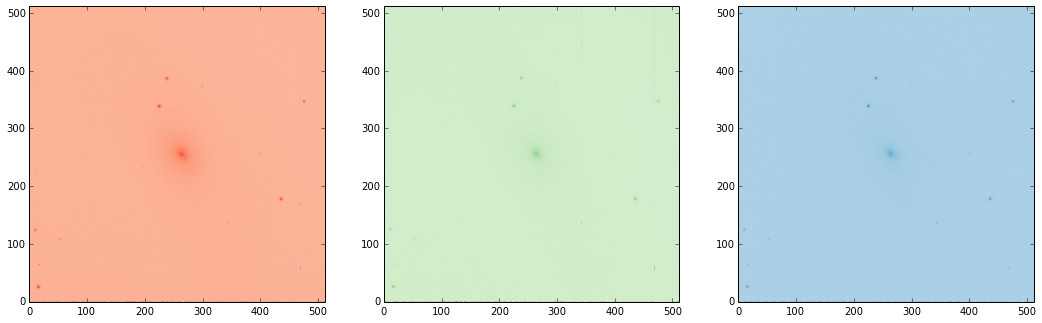

In [197]:
plt.figure(figsize=(18,12))
plt.subplot(131); plt.imshow(finalimage_R, origin='lower', cmap='Reds',norm=LogNorm())
plt.subplot(132); plt.imshow(finalimage_G, origin='lower', cmap='Greens',norm=LogNorm())
plt.subplot(133); plt.imshow(finalimage_B, origin='lower', cmap='Blues',norm=LogNorm())

### RGB rendering?!
Just for fun, can I generate the image in fake color?

In [221]:
## RGB composite
finimg_comp = np.dstack((finalimage_R/np.max(finalimage_R)*256,
                         finalimage_G/np.max(finalimage_G)*256,
                         finalimage_B/np.max(finalimage_B)*256))

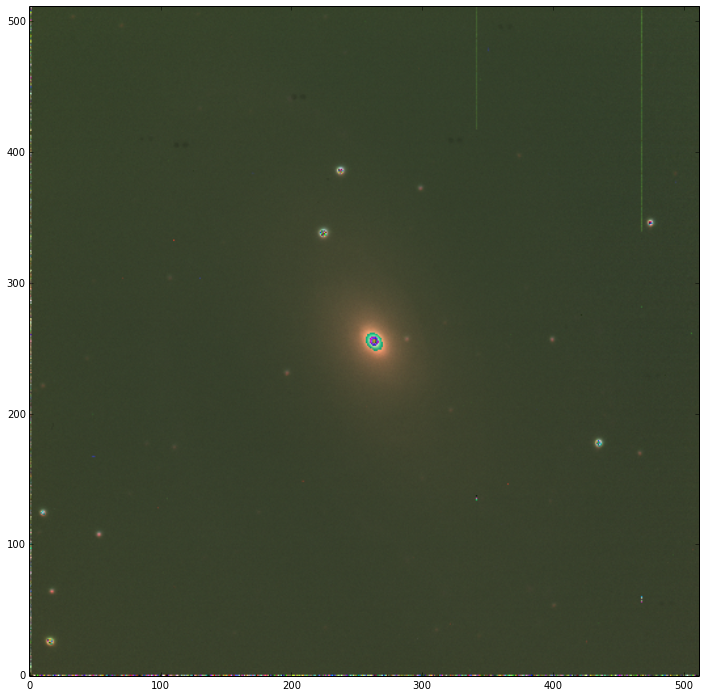

In [224]:
plt.figure(figsize=(12,12))
plt.imshow(finimg_comp, origin="lower")

Well, though generally OKay, the "rainbows" clearly demonstrate that the three bands have different resolutions...(or because of, again, the shifting due to Earth rotation). The angular scales of the colors do not show up as the same "blub"

In [227]:
# Saving files as fits objects
newscience_R = basename+'_R_CleanScience.fits'
newscience_G = basename+'_G_CleanScience.fits'
newscience_B = basename+'_B_CleanScience.fits'

newbias = basename+'_Bias.fits'
newdark = basename+'_Master_Dark.fits'
newflat = basename+'_Master_Flat.fits'

sciencehdu_R = pyfits.PrimaryHDU(finalimage_R,header=sciheader_R)
sciencehdu_G = pyfits.PrimaryHDU(finalimage_G,header=sciheader_G)
sciencehdu_B = pyfits.PrimaryHDU(finalimage_B,header=sciheader_B)

sciencehdu_R.writeto(newscience_R, clobber=True)
sciencehdu_G.writeto(newscience_G, clobber=True)
sciencehdu_B.writeto(newscience_B, clobber=True)

###
biashdu = pyfits.PrimaryHDU(finalbias)
biashdu.writeto(newbias, clobber=True)

darkhdu = pyfits.PrimaryHDU(finaldark)
darkhdu.writeto(newdark, clobber=True)

flathdu = pyfits.PrimaryHDU(finalflat)
darkhdu.writeto(newflat, clobber=True)

Overwrite existing file 'M81_Bias.fits'.
Overwrite existing file 'M81_Master_Dark.fits'.
Overwrite existing file 'M81_Master_Flat.fits'.
